In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
TRAIN_DIR = './data/train/'
TEST_DIR = './data/test/'

ROWS = 256
COLS = 256
ROWS2 = 64
COLS2 = 64
CHANNELS = 3

In [2]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [3]:
# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
train_images = train_dogs[:10000] + train_cats[:10000]
random.shuffle(train_images)
test_images =  test_images[:1000]

In [4]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    b,g,r = cv2.split(img)
    img2 = cv2.merge([r,g,b])
    return cv2.resize(img2, (ROWS2, COLS2), interpolation=cv2.INTER_CUBIC)

In [5]:
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS2, COLS2), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%1000 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

In [6]:
train = prep_data(train_images)
test = prep_data(test_images)

Processed 0 of 20000
Processed 1000 of 20000
Processed 2000 of 20000
Processed 3000 of 20000
Processed 4000 of 20000
Processed 5000 of 20000
Processed 6000 of 20000
Processed 7000 of 20000
Processed 8000 of 20000
Processed 9000 of 20000
Processed 10000 of 20000
Processed 11000 of 20000
Processed 12000 of 20000
Processed 13000 of 20000
Processed 14000 of 20000
Processed 15000 of 20000
Processed 16000 of 20000
Processed 17000 of 20000
Processed 18000 of 20000
Processed 19000 of 20000
Processed 0 of 1000


In [7]:
print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Train shape: (20000, 3, 64, 64)
Test shape: (1000, 3, 64, 64)


(array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

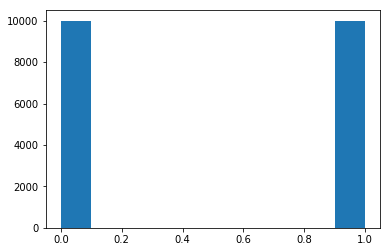

In [8]:
labels = []
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

plt.hist(labels)

In [9]:
def show_cats_and_dogs(idx):
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    pair = np.concatenate((cat, dog), axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()

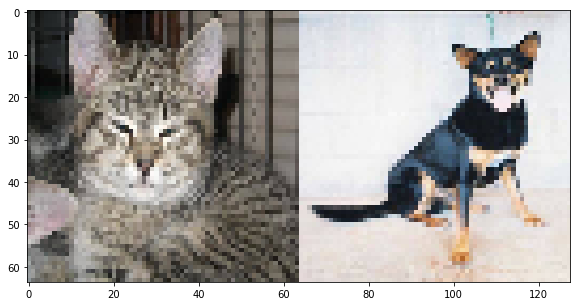

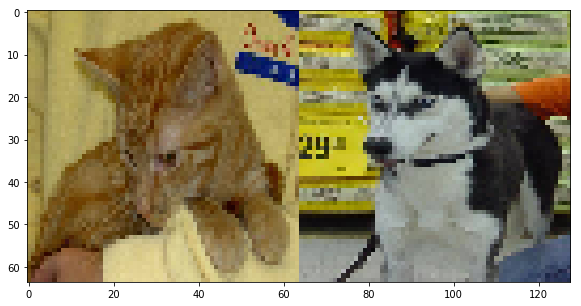

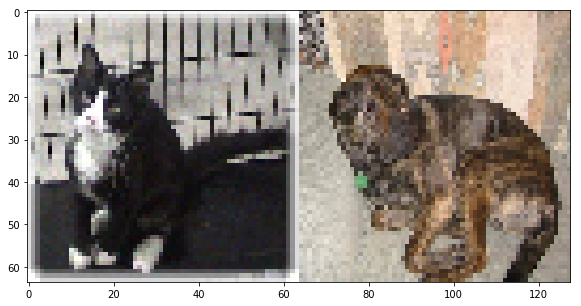

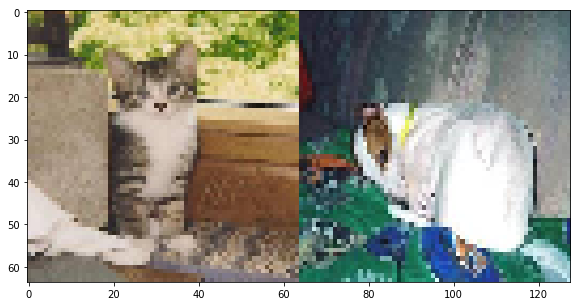

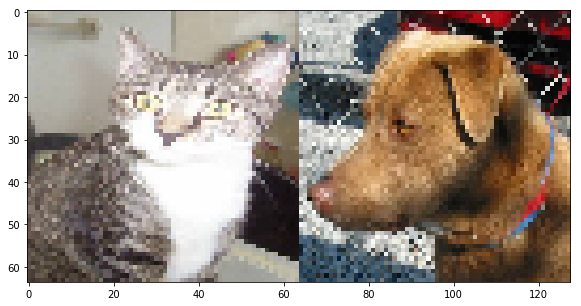

In [10]:
for idx in range(0,5):
    show_cats_and_dogs(idx)

In [11]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


In [12]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

In [13]:
model = Sequential()
model.add(Conv2D(32, 3, padding='same', input_shape=train.shape[1:], activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

#print("First layer...")
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

#print("Second layer...")
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

#print("Third layer...")
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
print("Compiling model...")
model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])

Compiling model...


In [14]:
epochs = 10
batch_size = 16

In [15]:
model.fit(train, labels, batch_size=batch_size, epochs=epochs,
              validation_split=0.25, verbose=2, shuffle=True)

Train on 15000 samples, validate on 5000 samples
Epoch 1/10
 - 10s - loss: 0.7090 - acc: 0.5337 - val_loss: 0.6791 - val_acc: 0.5474
Epoch 2/10
 - 9s - loss: 0.6445 - acc: 0.6315 - val_loss: 0.6333 - val_acc: 0.6484
Epoch 3/10
 - 9s - loss: 0.6232 - acc: 0.6565 - val_loss: 0.5992 - val_acc: 0.6682
Epoch 4/10
 - 9s - loss: 0.6076 - acc: 0.6725 - val_loss: 0.5916 - val_acc: 0.6826
Epoch 5/10
 - 9s - loss: 0.5934 - acc: 0.6883 - val_loss: 0.5843 - val_acc: 0.6934
Epoch 6/10
 - 9s - loss: 0.5853 - acc: 0.6990 - val_loss: 0.5937 - val_acc: 0.6886
Epoch 7/10
 - 9s - loss: 0.5850 - acc: 0.7002 - val_loss: 0.5810 - val_acc: 0.6940
Epoch 8/10
 - 9s - loss: 0.5898 - acc: 0.7031 - val_loss: 0.6024 - val_acc: 0.6694
Epoch 9/10
 - 9s - loss: 0.5962 - acc: 0.7088 - val_loss: 0.6093 - val_acc: 0.7024
Epoch 10/10
 - 9s - loss: 0.5821 - acc: 0.7142 - val_loss: 0.6572 - val_acc: 0.7020


In [16]:
predictions = model.predict(test, verbose=0)

I am 70.94% sure this is a Cat


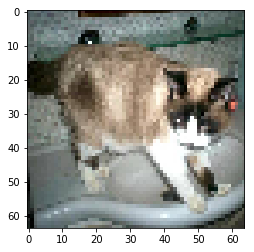

I am 88.75% sure this is a Cat


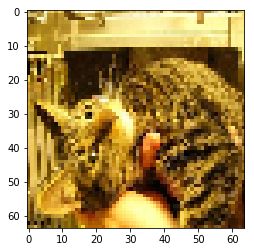

I am 83.29% sure this is a Cat


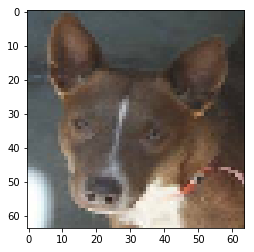

I am 58.59% sure this is a Cat


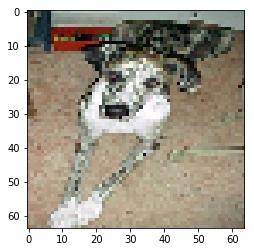

I am 98.84% sure this is a Cat


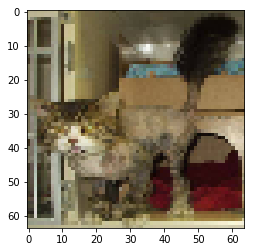

I am 71.61% sure this is a Cat


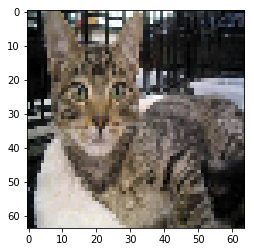

I am 61.49% sure this is a Dog


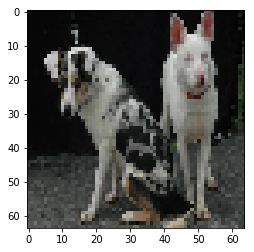

I am 100.00% sure this is a Cat


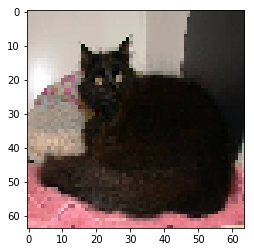

I am 59.91% sure this is a Cat


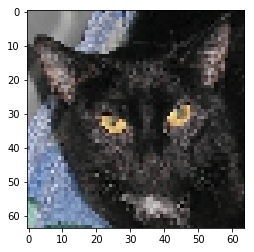

I am 88.09% sure this is a Dog


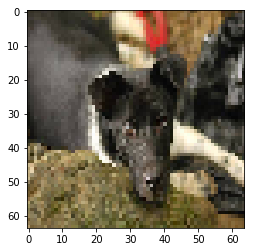

In [17]:
for i in range(0,10):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i][0]))
        
    plt.imshow(test[i].T)
    plt.show()